In [4]:
import numpy as np
from adfp import Variable
import adfp.functions as F
from adfp import plot_dot_graph

In [5]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

In [6]:
x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
x.grad

variable(24.0)

In [7]:
gx = x.grad
x.cleargrad()
gx.backward()
x.grad

variable(44.0)

In [8]:
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)

    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad

    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [9]:
x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)
gx = x.grad
print(f'0: {y}')
print(f'1: {x.grad}')

for i in range(2, 7):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(f'{i}: {x.grad}')

0: variable(0.8414709848078965)
1: variable(0.5403023058681398)
2: variable(-0.8414709848078965)
3: variable(-0.5403023058681398)
4: variable(0.8414709848078965)
5: variable(0.5403023058681398)
6: variable(-0.8414709848078965)


In [10]:
x = Variable(np.array(3.0))
y = F.square(x)
y.backward(create_graph=True)
gx = x.grad
print(f'1: {gx}, {x.is_updated_grad}')

for i in range(2, 5):
    x.cleargrad()
    gx.backward(create_graph=True)
    gx = x.grad
    print(f'{i}: {gx}, {x.is_updated_grad}')
 

1: variable(6.0), True
2: variable(2.0), True
3: variable(0.0), False
4: variable(0.0), False


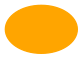

In [11]:
plot_dot_graph(gx, verbose=False)

In [12]:
x = Variable(np.array(1.0))
x.backward()
gx = x.grad
print(f'start: {type(gx)}, {x.grad}')

start: <class 'adfp.core.variable.Variable'>, variable(1.0)
